In [1]:
# !git clone https://github.com/febse/ta2025.git repo

import numpy as np
import plotly.graph_objects as go

try:
    from animations import *
except ImportError:
    from repo.animations import *


# Linear Algebra Essentials

Embed a local video:

{{< video videos/VectorMovement.mp4 >}}

## Vectors: Arrows, Lists

Imagine that you have two bank accounts: one in Bulgarian levs (BGN) and one in Euros (EUR). You want to keep track of how much money you have in each account which is to say you want to keep track of two numbers. You start with 0 BGN and 0 EUR and deposit 2 BGN and 1 EUR.

$$
\begin{bmatrix} 0 \quad \text{BGN} \\ 0 \quad \text{EUR} \end{bmatrix} + \begin{bmatrix} 1 \quad \text{BGN} \\ 2 \quad \text{EUR} \end{bmatrix} = \begin{bmatrix} 0 + 1 \quad \text{BGN} \\ 0 + 2  \quad \text{EUR}\end{bmatrix}
$$

You end up with a new list of two numbers: 2 BGN and 1 EUR. To simplify the notation we can drop the currency labels and just write the numbers in a column but keep in mind that the first number corresponds to BGN and the second to EUR. The amounts in both accounts will then look like a table with two rows and one column, let's call it vector and name it $\vec{v}$:

$$
\vec{v} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}
$$

Somewhat unusually for accounting but you can associate this collection of values with a geometric object: an arrow in a plane pointing from the origin (0, 0) to the point (1, 2).


## Sums and Differences of Vectors

Imagine that after the initial deposit you receive a payment of 2 BGN and send a transfer of 1 EUR. You can represent these as movement instructions in the BGN-EUR plane:

- Move 2 units right (increase BGN by 2)
- Move 1 unit down (decrease EUR by 1)

After this the new balances will be 2 BGN and 1 EUR which you can represent or with our list notation:

$$
\begin{bmatrix} 1 \\ 2 \end{bmatrix} + \
\begin{bmatrix} 2 \\ -1 \end{bmatrix} = \begin{bmatrix} 1 + 2 \\ 2 + (-1) \end{bmatrix} = \begin{bmatrix} 3 \\ 1 \end{bmatrix}
$$

This is the same as if you directly write down the _net_ deposits into the accounts: 3 BGN and 1 EUR. In other words, the sum of the two vectors gives you the coordinates of the final point after following the movement instructions so that you can go to it directly (in one step) from the origin.


Differences of vectors work in exactly the same way. Let's view the second bank operation and multiply it by -1. This will mean that instead of receiving 2 BGN and sending 1 EUR you will send 2 BGN and receive 1 EUR so the final balance after that operation will be -1 BGN (you owe 1 BGN to your bank) and 3 EUR:

$$
\begin{bmatrix} 1 \\ 2 \end{bmatrix} - \
\begin{bmatrix} 2 \\ -1 \end{bmatrix} = \begin{bmatrix} 1 - 2 \\ 2 - (-1) \end{bmatrix} = \begin{bmatrix} -1 \\ 3 \end{bmatrix}
$$

In [ ]:
# Plot the sum of two vectors as a triangle, keeping the original vectors in place


# Example vectors
a = np.array([1, 2])
b = np.array([2, -1])

fig = show_sum(a, b)

fig.show()

## Scalar Multiplication

Let's continue with our bank example and the two accounts. Our first step was to deposit 1 BGN and 2 EUR and we obtained the list of balances

$$
\begin{bmatrix} 1 \\ 2 \end{bmatrix}
$$

Let's simply repeat this operation one more time: we again deposit 1 BGN and 2 EUR. The new balances will be:

$$
\begin{bmatrix} 1 + 1 \\ 2 + 2 \end{bmatrix} = \begin{bmatrix} 2 \cdot 1 \\ 2 \cdot 2 \end{bmatrix} = \begin{bmatrix} 2 \\ 4 \end{bmatrix}
$$

We can write this more concisely as a multiplication of the original vector by the number 2:

$$
2 \cdot \begin{bmatrix} 1 \\ 2 \end{bmatrix} = \begin{bmatrix} 2 \cdot 1 \\ 2 \cdot 2 \end{bmatrix} = \begin{bmatrix} 2 \\ 4 \end{bmatrix}
$$

In general, multiplying a vector by a number (called scalar) means multiplying each entry of the vector by that number. Geometrically this means stretching the arrow by that factor (if the factor is greater than 1) or shrinking it (if the factor is between 0 and 1). If the factor is negative, the arrow is also flipped to point in the opposite direction.


In [ ]:
def generate_scaling_matrices(scale_factors):
    """Generate scaling matrices for a sequence of scale factors.
    
    Args:
        scale_factors: array or list of scale factors (uniform scaling)
    
    Returns:
        List of matrix lists, where each element is [S(scale)] for that scale factor
    """
    matrices_sequence = []
    for s in scale_factors:
        # Uniform scaling matrix
        S = np.array([[s, 0],
                      [0, s]])
        matrices_sequence.append([S])
    return matrices_sequence


# Create a range of scale factors from -2.0 to 2.0 (including negative values)
scale_factors = np.linspace(-2.0, 2.0, 81)

# Use heart points as the input set
pts = heart_param_points(n=60)

# Generate scaling matrices
matrices_sequence = generate_scaling_matrices(scale_factors)

# Show the transformation animation
fig = show_transformation(
    matrices_sequence=matrices_sequence,
    points=pts,
    L=5,
    title='Scaling Transformation: Interactive Slider',
    color_func=heart_line_color,
    frame_duration_ms=100
)

# Update slider labels to show scale factors instead of rotation angles
slider_steps = []
for idx, s in enumerate(scale_factors):
    step = {
        'label': f'{s:.2f}',
        'method': 'animate',
        'args': [[f'frame_{idx}'], {
            'mode': 'immediate',
            'frame': {'duration': 0, 'redraw': True},
            'transition': {'duration': 0}
        }]
    }
    slider_steps.append(step)

# Update the slider configuration
fig.update_layout(
    sliders=[{
        'active': 0,
        'currentvalue': {'prefix': 'Scale Factor: ', 'suffix': '', 'visible': True},
        'pad': {'t': 40},
        'steps': slider_steps
    }]
)

fig.show()

## Vector Magnitude

While the direction of a vector is an instruction of where to go, the magnitude (length) of the vector tells us how far to go in that direction.
We can compute it by using the Pythagorean theorem (extended to multiple dimensions). With two dimensions we have for the $v = (1, 2)^T$ vector:

$$
||v|| = \sqrt{1^2 + 2^2} = \sqrt{5} \approx 2.236
$$



## Vector Similarity


We consider two vectors to be similar if they point in similar directions. One way to measure this is to compute the cosine of the angle between them. This is called cosine similarity. The cosine theorem is an extension of the Pythagorean theorem and states that in a triangle with sides of lengths a, b and c and angle γ opposite to side c it holds that:

$$
c^2 = a^2 + b^2 - 2ab\cos(\theta)
$$

It can be extended to show the relation between the cosine between two vectors and their dot product.

$$
\cos(\theta) = \frac{u \cdot v}{||u|| \, ||v||}
$$

The cosine of any angle is restricted between -1 and 1 so you can think about it as the percentage of similarity between the directions in which the two vectors point. If the cosine is 1, the vectors point in the same direction, if it is -1 they point in opposite directions and if it is 0 they are orthogonal (perpendicular).

The dot product of two vectors is simply the sum of the products of their corresponding entries (so it is only defined for vectors of the same length).

For example:

$$
u = \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix}, \quad v = \begin{pmatrix} 1 \\ -1 \\ 0 \end{pmatrix} \quad \Rightarrow \quad u \cdot v = 1 \cdot 1 + 2 \cdot (-1) + 3 \cdot 0 = -1
$$

By the way, we can also view the dot product as the matrix multiplication of a 1 x n matrix (row vector) with an n x 1 matrix (column vector).

$$
u^T v = \begin{pmatrix} 1 & 2 & 3 \end{pmatrix} \begin{pmatrix} 1 \\ -1 \\ 0 \end{pmatrix} = -1
$$

To find the cosine of the two vectors we need their magnitudes as well:

$$
||u|| = \sqrt{1^2 + 2^2 + 3^2} = \sqrt{14} \approx 3.742
$$

$$
||v|| = \sqrt{1^2 + (-1)^2 + 0^2} = \sqrt{2} \approx 1.414
$$

Now we are ready to compute the cosine:

$$
\cos(\theta) = \frac{-1}{3.742 \cdot 1.414} \approx -0.189
$$

In [2]:
fig = show_dot_product_cosine()
fig.show()

In [63]:
# The same with numpy

import numpy as np

u = np.array([1, 2, 3])
v = np.array([1, -1, 0])

dot_product = np.dot(u, v)
print(f"Dot product of u and v using np.dot: {dot_product}")

Dot product of u and v using np.dot: -1


In [64]:
# The lengths (magnitudes) are

print(f"Length of u: {np.linalg.norm(u).round(3)}")
print(f"Length of v: {np.linalg.norm(v).round(3)}")

Length of u: 3.742
Length of v: 1.414


In [65]:
# So the cosine similarity is

cosine_similarity = dot_product / (np.linalg.norm(u) * np.linalg.norm(v))
print(f"Cosine similarity between u and v: {cosine_similarity.round(3)}")

Cosine similarity between u and v: -0.189


In [66]:
# Is it the same as the correlation?

np.corrcoef(u, v)

array([[ 1. , -0.5],
       [-0.5,  1. ]])

The correlation between two vectors is actually defined quite similarly.

$$
\rho_{u,v} = \frac{\sum_{i=1}^{n} (u_i - \bar{u})(v_i - \bar{v})}{\sqrt{\sum_{i=1}^{n} (u_i - \bar{u})^2} \sqrt{\sum_{i=1}^{n} (v_i - \bar{v})^2}}
$$

Both the correlation and the cosine similarity are restricted between -1 and 1 (i.e you can think about them as percentages). What is the difference then?

## Linear Transformations

A lot of real-life operations involve simple transformations such as for example calculating the average or the total balance of multiple bank accounts in different currencies.

Let's view the total balance of two bank accounts in BGN and EUR (in BGN) after the initial deposits (1 BGN and 2 EUR). To get the total balance in BGN we need to bring the EUR amount to BGN by multiplying it by the exchange rate (1 EUR = 1.95583 BGN) and then summing the two amounts.

$$
\text{Total in BGN} = \underset{\text{BGN/BGN}}{1} \cdot \underset{\text{amt BGN}}{1} + \underset{\text{BGN/EUR}}{1.95583} \cdot \underset{\text{amt EUR}}{2} = 4.91166 \, \text{BGN}
$$

Let's generalize this operation a bit. Let's generalize this operation a bit
by leaving the exact values of the amounts unspecified and writing them as variables $x$ and $y$. Then a function taking concrete amounts and returning the total in BGN can be written as:

$$
f(x, y) = 1 \cdot x + 1.95583 \cdot y
$$

In [67]:
def f(x, y):
    return 1 * x + 1.95583 * y

# Example usage
print(f(2 * 1, 2 * 7))

2 * f(1, 7)

29.381619999999998


29.381619999999998

This function has a couple of properties that make it quite simple and _easily predictable_:

- If you double both amounts, the total will double as well:

$$
f(2x, 2y) = 1 \cdot (2x) + 1.95583 \cdot (2y) = 2 \cdot (1 \cdot x + 1.95583 \cdot y) = 2f(x, y)
$$

In [68]:
f(2 * 1, 2 * 2)  # Should be 2 * f(1, 2)

9.823319999999999


- **Additivity** If you split the amounts into two parts and compute the total for each part separately, the overall total will be the sum of the two totals:

$$
\begin{align*}
f(x_1 + x_2, y_1 + y_2) & = 1 \cdot (x_1 + x_2) + 1.95583 \cdot (y_1 + y_2) \\
& = (1 \cdot x_1 + 1.95583 \cdot y_1) + (1 \cdot x_2 + 1.95583 \cdot y_2) \\
& = f(x_1, y_1) + f(x_2, y_2)
\end{align*}
$$

In [69]:
print("f(1, 2) + f(3, 4)", f(1, 2) + f(3, 4)) # Should be f(1 + 3, 2 + 4)
print("f(1 + 3, 2 + 4)", f(1 + 3, 2 + 4)) 

f(1, 2) + f(3, 4) 15.734979999999998
f(1 + 3, 2 + 4) 15.73498


And lastly, if there is no money in either account, the total is zero:

$$
f(0, 0) = 1 \cdot 0 + 1.95583 \cdot 0 = 0
$$

This is by the way not the case for functions like this one:

$$
g(x, y) = 1 \cdot x + 1.95583 \cdot y + 5
$$

$$
g(0, 0) = 1 \cdot 0^2 + 1.95583 \cdot 0 + 5 = 5 \neq 0
$$

By the way, we have already seen forms like the one in $f(x, y)$. When you compare it with the definition of the dot product you will notice that this nothing more than the dot product of a vector of exchange rates and a vector of amounts.

We can think about the function $f(x, y)$ as taking a vector argument and returning a scalar value:

$$
f\left(\begin{bmatrix} x \\ y \end{bmatrix}\right) = \begin{bmatrix} 1 & 1.95583 \end{bmatrix} \cdot \begin{bmatrix} x \\ y \end{bmatrix}
$$

For the sake of intuition we can name the function $f$ for example "total BGN calculator". What if we want to create another function that calculates the average balance in EUR? It should take the same vector argument (the amounts in BGN and EUR) and return a scalar value (the average balance in EUR). We can write it like this:

$$
h\left(\begin{bmatrix} x \\ y \end{bmatrix}\right) = \frac{1}{2} \left( \underset{\text{EUR/BGN}}{0.51129} \cdot \underset{\text{amt BGN}}{x} + \underset{\text{EUR/EUR}}{1} \cdot \underset{\text{amt EUR}}{y} \right)
$$

or more concisely using the dot product notation:

$$
h\left(\begin{bmatrix} x \\ y \end{bmatrix}\right) = \frac{1}{2} \begin{bmatrix} 0.51129 & 1 \end{bmatrix} \cdot \begin{bmatrix} x \\ y \end{bmatrix}
$$

Now, as we are getting more familiar with these functions, we may want to play around and try to combine them so that we have a single function that returns both the total in BGN and the average in EUR. Because it must return two values we can think about it as returning a vector:

$$
F\left(\begin{bmatrix} x \\ y \end{bmatrix}\right) = \begin{bmatrix} f\left(\begin{bmatrix} x \\ y \end{bmatrix}\right) \\ h\left(\begin{bmatrix} x \\ y \end{bmatrix}\right) \end{bmatrix} = \begin{bmatrix} \begin{bmatrix} 1 & 1.95583 \end{bmatrix} \cdot \begin{bmatrix} x \\ y \end{bmatrix} \\ \frac{1}{2} \begin{bmatrix} 0.51129 & 1 \end{bmatrix} \cdot \begin{bmatrix} x \\ y \end{bmatrix} \end{bmatrix}
$$

Now this expression is full of brackets so that it is a bit hard to read. Keeping in mind what operations are being performed we can drop the brackets and write it more concisely as:

$$
F\left(\begin{bmatrix} x \\ y \end{bmatrix}\right) = \begin{bmatrix} 1 & 1.95583 \\ \frac{1}{2} \cdot 0.51129 & \frac{1}{2} \cdot 1 \end{bmatrix} \cdot \begin{bmatrix} x \\ y \end{bmatrix}
$$

Again, remember that we have two mini-functions, each returning a scalar value by calculating a dot product between a set of weights (exchange rates, averaging factor) and the input vector (amounts in BGN and EUR). The function $F$ simply stacks the two scalar values into a list (vector) and returns it.

In particular, note that this new function $F$ also has the same three properties as the original functions $f$ and $h$:

- If you double both amounts, both the total and the average will double as well:

$$
F\left(\begin{bmatrix} 2x \\ 2y \end{bmatrix}\right) = 2 \cdot F\left(\begin{bmatrix} x \\ y \end{bmatrix}\right)
$$
- **Additivity** If you split the amounts into two parts and compute the total and average for each part separately, the overall total and average will be the sum of the two totals and averages:

$$
F\left(\begin{bmatrix} x_1 + x_2 \\ y_1 + y_2 \end{bmatrix}\right) = F\left(\begin{bmatrix} x_1 \\ y_1 \end{bmatrix}\right) + F\left(\begin{bmatrix} x_2 \\ y_2 \end{bmatrix}\right)
$$

- If there is no money in either account, both the total and the average are zero:
$$
F\left(\begin{bmatrix} 0 \\ 0 \end{bmatrix}\right) = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
$$

Also not another thing: this function takes a vector with two entries and returns a vector with two entries. In general this function maps vectors from a 2-dimensional space to vectors in another 2-dimensional space. To make things more compact, we can ignore the measurement units (BGN and EUR) and think about this function as mapping vectors from $\mathbb{R}^2$ to $\mathbb{R}^2$.

We can also imagine that the function $F$ takes the input and _moves_ it to a new location in the 2D space.

You can also imagine other functions just as $F$ that report different summaries of the amounts in the two accounts such as for example only the amount in BGN, only the amount in EUR. As long as these functions have the three properties mentioned above, they can all be calculated as dot products between a set of weights and the input vector and their outputs can be stacked into a vector and returned together.

$$
G\left(\begin{bmatrix} x \\ y \end{bmatrix}\right) = \begin{bmatrix} 1 & 1.95583 \\ \frac{0.51}{2} & \frac{1}{2} \\ 0 & 1 \\ 1 & 0 \\ 0 & 1.95583 \end{bmatrix} \cdot \begin{bmatrix} x \\ y \end{bmatrix} = 
\begin{bmatrix} 1x + 1.95583y \\ \frac{0.51}{2}x + \frac{1}{2}y \\ 0x + 1y \\ 1x + 0y \\ 0x + 1.95583y \end{bmatrix}
$$

For the sake of intuitive understanding, let's name the operations performed by $G$. The first row computes the total in BGN, the second row computes the average in EUR, the third row extracts the amount in EUR and the fourth row extracts the amount in BGN, the fifth one calculates only the amount in BGN
of the Euro account. As the function returns a list of five elements, we can think about it as mapping vectors from $\mathbb{R}^2$ to vectors in $\mathbb{R}^5$.


When you look at both $F$ and $G$ you will notice all we need to know
about these functions is contained in the tables of weights, so we can simplify our notation even further by just writing down the weight matrices. For example, we can write:

$$
\begin{bmatrix} 1 & 1.95583 \\ \frac{1}{2} \cdot 0.51129 & \frac{1}{2} \cdot 1 \end{bmatrix}
$$

and 

$$
\begin{bmatrix} 1 & 1.95583 \\ \frac{0.51}{2} & \frac{1}{2} \\ 0 & 1 \\ 1 & 0 \\ 0 & 1.95583 \end{bmatrix}
$$

Implicitly, we will understand that these matrices represent functions that take vectors from $\mathbb{R}^2$ and return vectors in $\mathbb{R}^2$ and $\mathbb{R}^5$ respectively by calculating the dot products between their rows and the input vector.

We started the discussion with a very simple (though not entirely artificial) example of an accounting operation but we arrived at a quite general function that works not only with the specific amounts we started with (1 BGN and 2 EUR) but with any amounts in the two accounts. Now, going beyond accounting, we can ask: where does this function move all the vectors in the 2D space? In other words, what is the image of the entire space $\mathbb{R}^2$ under the transformation $F$?

For this it is convenient to plot a couple of vectors and look at where they end up after applying the transformation.

In [70]:
def F(x: np.ndarray) -> np.ndarray:
    return np.array([
        1 * x[0] + 1.95583 * x[1], # The first dot product (total in BGN)
        (0.51 * x[0] + 1 * x[1]) / 2 # The second dot product (average in EUR)
    ])

print("F([1, 2])", F(np.array([1, 2])))
print("F([1, 2])", F(np.array([4, 1])))


F([1, 2]) [4.91166 1.255  ]
F([1, 2]) [5.95583 1.52   ]


## Geometric View of Linear Transformations

Let's take $F$ from the example so far and calculate the image of a few vectors under this transformation. To emphasize the geometric aspect, we want to show the _movement_ of the original vectors to their new locations after applying the transformation (hence the animation).

Let's look at a couple of matrices and see what the do.

$$
S = \begin{bmatrix} 1 & 2 \\ 0 & 1 \end{bmatrix} \quad \text{shear in x-direction}
$$

$$
R = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} \quad \text{90 degree rotation}
$$

In [71]:
# Define target transformation matrix M

# M = np.array([
#     [0, -1],
#     [1, 0]
# ])

M = np.array([
    [1, 0],
    [0, 1]
])

# Build an interpolation from Identity to M: T(t) = I + t (M - I)
I = np.eye(2)
steps = 25
matrices_sequence = []
for k in range(steps + 1):
    t = k / steps
    T_t = I + t * (M - I)
    matrices_sequence.append([T_t])  # each frame applies one matrix

# Use heart points as the input set
pts = heart_param_points(n=60)

# Show the transformation animation
fig = show_transformation(
    matrices_sequence=matrices_sequence,
    points=pts,
    L=5,
    title='Heart Points: Identity → Target Matrix',
    color_func=heart_line_color,
    frame_duration_ms=300
)
fig.show()

Pay special attention to the locations where the function maps the two vectors

$$
e_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad 
e_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

In [72]:
print("F([1, 0])", F(np.array([1, 0])))
print("F([0, 1])", F(np.array([0, 1])))

F([1, 0]) [1.    0.255]
F([0, 1]) [1.95583 0.5    ]


These vectors are especially convenient because we can easily express any other vector in $\mathbb{R}^2$ by scaling and adding them together.

For example our account balances at the start were:

$$
\begin{bmatrix} 1 \\ 2 \end{bmatrix} = 1 \underset{e_1}{\begin{bmatrix} 1 \\ 0 \end{bmatrix}}
+ 2 \underset{e_2}{\begin{bmatrix} 0 \\ 1 \end{bmatrix}} = 
\begin{bmatrix} 1 \\ 0 \end{bmatrix} + \begin{bmatrix} 0 \\ 2 \end{bmatrix}
= \begin{bmatrix} 1 + 0 \\ 0 + 2 \end{bmatrix}
= \begin{bmatrix} 1 \\ 2 \end{bmatrix}
$$

Here you can also see why the three properties (additivity, homogeneity, and a zero fixed point) are important.

To find the image of any vector under $F$ we only need to track where it 
sends $e_1$ and $e_2$. To see this, look at the example.

$F$ moves $\begin{bmatrix} 1 \\ 2 \end{bmatrix}$ to $\begin{bmatrix} 4.9 \\ 1.2 \end{bmatrix}$. But we can also find this by looking at the transformed basis vectors.

$$
\begin{align*}
e^{*}_1 & = F(e_1) = \begin{bmatrix} 1 \\ 0.25 \end{bmatrix} \\
e^{*}_2 & = F(e_2) = \begin{bmatrix} 1.955 \\ 0.5 \end{bmatrix}
\end{align*}
$$

From the additivity property of $F$ follows that

$$
\begin{align*}
F(v) & = F(1 e_1 + 2 e_2) \\
    &  = F(1e_1) + F(2e_2) \quad \text{additivity} \\
    & = 1 F(e_1) + 2F(e_2) \quad \text{homogeneity} \\
    & = 1 e^{*}_1 + 2 e^{*}_2 
\end{align*}
$$

So the transformed vector can be found as a linear combination of the transformed basis vectors. As the transformed basis vectors are simply the columns of the transformation matrix, we can find the transformed vector by directly weighing and summing the columns of the matrix.

$$
F(v) = 1 \begin{bmatrix} 1 \\ 0.25 \end{bmatrix} + 2 \begin{bmatrix} 1.955 \\ 0.5 \end{bmatrix} = \begin{bmatrix} 4.911 \\ 1.25 \end{bmatrix}
$$

In a more general setting, we can define the transformation of any vector $v$ in $\mathbb{R}^2$ by a matrix $A$ as follows:

$$
A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}, \quad v = \begin{bmatrix} x \\ y \end{bmatrix}
$$

$$
A(v) = x \begin{bmatrix} a \\ c \end{bmatrix} + y \begin{bmatrix} b \\ d \end{bmatrix} = \begin{bmatrix} ax + by \\ cx + dy \end{bmatrix}
$$

You will recognize this as the standard definition of matrix multiplication and in fact, the transformation
is often written simply as:

$$
A v 
$$

because it shares some properties with multiplication of numbers:



- If you double the vector, the result will double as well:

$$
A (2v) = 2 A(v)
$$

- The transformation is associative 

$$
A (B C) v  = (A B) C v
$$

- Distributive over vector addition:

$$
A (u + v) = A(u) + A(v)
$$

It is not commutative (meaning you can't swap the order of matrix multiplications). Generally:

$$
A B v \neq B A v
$$


In [73]:
# Use numpy to 

x = np.array([1, 2])
M = np.array([[1.95583, 1.70], [0, 1]])

M.dot(x)
M @ x

array([5.35583, 2.     ])

## Change of Basis

The coordinate system that we used so far is called the _standard basis_ and every vector in $\mathbb{R}^2$ can be expressed as a linear combination of the two basis vectors $e_1$ and $e_2$. Its main convenience is that the coordinates of a vector in this basis are simply its x and y values.

However, except for an agreement on what the origin is, the units and the directions of the axes are completely arbitrary and we are free to choose any other pair of vectors (directions and magnitudes) as basis vectors. The only requirement is that when we scale and combine them we can reach any point in the 2D space (we say that they span the space). For example, the vectors

$$
b_1 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}, \quad 
b_2 = \begin{bmatrix} -2 \\ 2 \end{bmatrix}
$$

By adding scaled versions of these two vectors we can reach any point in the 2D space:

$$
\alpha \begin{bmatrix} 1 \\ 1 \end{bmatrix} + \beta \begin{bmatrix} -2 \\ 2 \end{bmatrix}
$$

just as we did with the standard basis vectors. 


In [74]:
import numpy as np

try:
    from animations import *
except ImportError:
    from repo.animations import *

# Define two vectors
a = np.array([1, 1])
b = np.array([2, 2])

fig = show_span(a, b)

fig.show()


Now, let's say that a friend of ours uses these two vectors as a basis and tells us the coordinates of a point in this basis, let's say

$$
v = \begin{bmatrix} 3 \\ 4 \end{bmatrix}_{B}
$$

This means that to reach the point we need to walk 3 units in the direction of $b_1$ and 4 units in the direction of $b_2$:

$$
v = 3 \begin{bmatrix} 1 \\ 1 \end{bmatrix} + 4 \begin{bmatrix} -2 \\ 2 \end{bmatrix} = \begin{bmatrix} 3 - 8 \\ 3 + 8 \end{bmatrix} = \begin{bmatrix} -5 \\ 11 \end{bmatrix}_{\text{standard}}
$$

Note that this is completely different from walking 3 units in the x-direction and 4 units in the y-direction which would lead us to the point (3, 4).

$$
v = 3 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 4 \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 3 \\ 4 \end{bmatrix}_{\text{standard}}
$$

So, how did we translate his coordinates to our standard basis system? We have simply followed the instructions encoded in his coordinates but instead of using the standard basis vectors we have used his basis vectors. We ended up with a linear combination of his basis vectors but this is exactly what a matrix multiplication does.



So let's take the basis vectors and stack them as columns of a matrix:

$$
B = \begin{bmatrix} 1 & -2 \\ 1 & 2
\end{bmatrix}
$$

Now we can find the coordinates of any vector in the standard basis by multiplying the basis matrix with the vector expressed in the new basis:

$$
B \cdot v_{B} = \begin{bmatrix} 1 & -2 \\ 1 & 2
\end{bmatrix} \cdot \begin{bmatrix} 3 \\ 4 \end{bmatrix} = \begin{bmatrix} -5 \\ 11 \end{bmatrix}_{\text{standard}}
$$

What if we need to translate our coordinates to his system? Note that this is the same question as asking how much one kilogram is in grams. We know that 1 kg = 1000 g so to convert from grams to kilograms we need to divide by 1000 or multiply by 0.001. In other words, we need to find the inverse of the conversion factor. The only difference here is that instead of a single direction (the real number line) we have two directions (the 2D space) so instead of a single number we need to find the inverse of a 2x2 matrix.

If we translate his coordinates to ours by applying the transformation $B$ and then translate back by applying the inverse transformation $B^{-1}$ we should end up where we started:

$$
B^{-1} B v_{B} = v_{B}
$$

By reversing the transformation of $B$ we actually did a "change nothing" operation which is called the identity transformation and is represented by the identity matrix:

$$
I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
$$

So the question boils down to finding a matrix $B^{-1}$ such that:

$$
B^{-1} B = I
$$


In [75]:
B = np.array([[1, 1], [-2, 2]])

B_inv = np.linalg.inv(B)

In [76]:
B_inv @ B

array([[1., 0.],
       [0., 1.]])

In [77]:
# Translate the coordinates (2, 5) to the basis B

B_inv @ np.array([2, 5])

array([-0.25,  2.25])

In [78]:
# Define the new basis vectors
u = np.array([1, 1])
v = np.array([-2, 2])

fig = show_basis_vectors(u, v)
fig.show()

## Eigenvectors and Eigenvalues

Until now we have see how linear functions (transformations) move vectors in space. Let's look at an example transformation:

$$
A = \begin{bmatrix} 5/4 & 3/4 \\ 5/4 & 3/4 \end{bmatrix}
$$



In [79]:
# Define the transformation matrix A
A = np.array([[5/4, 3/4],
            [3/4, 5/4]])

# Vectors to show
v3 = np.array([3, -5])
v4 = np.array([3, 1])
v5 = np.array([-4, 4])
v6 = np.array([2, 2])

fig = show_eigen_directions(A, [v3, v4, v5, v6])

fig.show()

The demonstration above show that the matrix $A$ has two directions in which it does not rotate the vectors but only stretches or shrinks them which is somewhat surprising. This means that the whole transformation in this two directions
only acts as a multiplication by a scalar value. These special vectors are called *eigenvectors* and the scaling factors are called *eigenvalues*. We can express this mathematically as:

$$
A \vec{v} = \lambda \vec{v}
$$

where $\vec{v}$ is the eigenvector and $\lambda$ is the eigenvalue (a scalar). We can find them by solving the equation above for $\vec{v}$ and $\lambda$. Rearranging the equation we get:

$$
(A - \lambda I) \vec{v} = 0
$$

Note that we can write $\lambda \vec{v}$ as

$$
\lambda \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = v_1 \begin{bmatrix} \lambda \\ 0 \end{bmatrix} + v_2 \begin{bmatrix} 0 \\ \lambda \end{bmatrix} = \begin{bmatrix} \lambda v_1 \\ \lambda v_2 \end{bmatrix}
$$



In [80]:
A

eigenvalues, eivenvectors = np.linalg.eig(A)
print(eivenvectors)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


## Diagonalization

Let's look at a transformation defined by the matrix

$$
A = \begin{bmatrix} 2 & 0 \\ 0 & 0.5 \end{bmatrix} \begin{bmatrix} 1 / 2 & 0 \\ 0 & 2 \end{bmatrix}
$$

$$
A v = \begin{bmatrix} 2 & 0 \\ 0 & 0.5 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 2x \\ 0.5y \end{bmatrix}
$$

Can you figure out its eigenvectors and eigenvalues?


In [81]:
# Diagonal matrix (scaling x by 2, y by 0.5)
D = np.array([[2.0, 0.0], [0.0, 0.5]])

# Interpolate from identity to D
n_frames = 30
matrices_sequence = []
for k in range(n_frames+1):
    t = k / n_frames
    M = (1-t)*np.eye(2) + t*D
    matrices_sequence.append([M])

# Points to transform (heart shape)
pts = heart_param_points(n=40)

# Show transformation animation
fig = show_transformation(
    matrices_sequence=matrices_sequence,
    points=pts,
    L=5,
    title='Transformation Animation: Interpolating to Diagonal Matrix',
    color_func=heart_line_color,
    frame_duration_ms=200
)
fig.show()

It is especially easy to work with diagonal matrices like this one because it is very easy to compute powers of them as well as their inverses (if the diagonal entries are non-zero). For example:

$$
A^2 = \begin{bmatrix} 2^2 & 0 \\
0 & 0.5^2 \end{bmatrix} = \begin{bmatrix} 4 & 0 \\ 0 & 0.25 \end{bmatrix}
$$

$$
A^{-1} = \begin{bmatrix} 1/2 & 0 \\ 0 & 2 \end{bmatrix}
$$

Now, the matrices that we have used as an example so far does not share these nice properties. However, what if we can find a basis in which the transformation matrix is diagonal? We have already seen that a matrix acts as a diagonal matrix in the directions of its eigenvectors so if we can express any other vector in units of the eigenvectors we can use the nice properties of diagonal matrices in this new basis.

We actually already know how to translate between bases. Let E be the matrix with the eigenvectors as columns. 

$$
E = \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$$

then multiplying a vector expressed in the eigenvector basis by E will translate it to the standard basis. To go the other way round we need to multiply by the inverse of E.

$$
E^{-1} = \begin{bmatrix} 0.5 & 0.5 \\ 0.5 & -0.5 \end{bmatrix}
$$

So for example if we have a vector

$$
v = \begin{bmatrix} 5 \\ 1 \end{bmatrix}
$$

its coordinates in units of the eigenvectors will be:

$$
v_{E} = E^{-1} v = \begin{bmatrix} 0.5 & 0.5 \\ 0.5 & -0.5 \end{bmatrix} \cdot \begin{bmatrix} 5 \\ 1 \end{bmatrix} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
$$

We can apply the transformation to the eigenvector coordinates by simply scaling them by the eigenvalues:

$$
\Lambda = \begin{bmatrix} 2 & 0 \\ 0 & 0.5 \end{bmatrix}
$$

And lastly we need to translate the result back to the standard basis by multiplying by E:

$$
A v = E \Lambda E^{-1} v
$$

## Matrix Multiplication (again)

### Weighted Sums of Columns

Another way to think about this multiplication is that each column of the left matrix constructs a linear combination of the columns of the right matrix.

$$
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}
\begin{pmatrix}
a & b \\
c & d \\
\end{pmatrix} =
\begin{pmatrix}
a \begin{pmatrix} 1 \\ 3 \end{pmatrix} + c \begin{pmatrix} 2 \\ 4 \end{pmatrix} & b \begin{pmatrix} 1 \\ 3 \end{pmatrix} + d \begin{pmatrix} 2 \\ 4 \end{pmatrix}
\end{pmatrix}
= \begin{pmatrix}
1 a + 2 c & 1 b + 2 d \\
3 a + 4 c & 3 b + 4 d
\end{pmatrix}
$$

The latter way of thinking about the multiplication is useful when we think about regression models where the coefficients weight different features (columns) to produce predictions.

### Sum of Outer Products

For understanding the SVD we need a third way of thinking about matrix multiplication and it is as a sum of outer products of the columns of the left matrix and the rows of the right matrix.

$$
\begin{align*}
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}
\begin{pmatrix}
a & b \\
c & d \\
\end{pmatrix}
& = \begin{pmatrix} 1 \\ 3 \end{pmatrix} \begin{pmatrix} a & b \end{pmatrix} + \begin{pmatrix} 2 \\ 4 \end{pmatrix} \begin{pmatrix} c & d \end{pmatrix} \\
& = \begin{pmatrix}
1 a & 1 b \\
3 a & 3 b \\
\end{pmatrix} +
\begin{pmatrix}
2 c & 2 d \\
4 c & 4 d \\
\end{pmatrix} \\
& = \begin{pmatrix}
1 a + 2 c & 1 b + 2 d \\
3 a + 4 c & 3 b + 4 d \\
\end{pmatrix}
\end{align*}
$$


## The Spectral Theorem

We should take time to appreciate the meaning of the equation above. It states that we can decompose a matrix transformation into three steps:

1. Change the basis to the eigenvector basis
2. Scale the coordinates by the eigenvalues
3. Change the basis back to the standard basis

This is especially useful when you need to compute powers of a matrix:

$$
\begin{align*}
A^2 & = (E \Lambda E^{-1})(E \Lambda E^{-1}) \\ 
    & = E \Lambda E^{-1} E \Lambda E^{-1} \\
    & = E \Lambda^2 E^{-1} \\
\end{align*}
$$

So you can replace a very costly (and possibly numerically unstable) matrix multiplication with two basis changes and computing powers of a diagonal matrix which is very easy (see above).

Another important application is that it provides a way approximate a matrix by a lower-rank matrix by simply keeping only the largest eigenvalues and their corresponding eigenvectors. This is used in many applications such as image compression and recommendation systems.

For a $2 \times 2$ with two distinct eigenvalues the spectral decomposition is given by:

$$
A = \lambda_1 e_{:1} e^{-1}_{1:} + \lambda_2 e_{:2} e^{-1}_{2:}
$$

where $e_{:i}$ is the i-th eigenvector as a column vector and $e^{-1}_{i:}$ is the i-th row of the inverse of the eigenvector matrix.

The magnitude of the eigenvalues tells us how important a direction (eigenvector) is for the transformation. If we want to approximate the transformation by a simpler matrix with fewer columns (lower rank) we can simply keep the first few eigenvalues and their corresponding eigenvectors and drop the rest.

In [82]:
print("The matrix A is:\n", A)

eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvectors_inv = np.linalg.inv(eigenvectors)

The matrix A is:
 [[1.25 0.75]
 [0.75 1.25]]


In [83]:
# The eigenvectors are the columns of the eigenvectors matrix

A = np.array([[5/4, 3/4],
              [3/4, 5/4]])

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors (columns):\n", eigenvectors)
print("Inverse of Eigenvectors matrix:\n", eigenvectors_inv)

Eigenvalues:
 [2.  0.5]
Eigenvectors (columns):
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Inverse of Eigenvectors matrix:
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [84]:
# Layer 1

eigenlayer_1 = np.linalg.outer(eigenvectors[:,0], eigenvectors_inv[0,:])
print("Eigenlayer 1:\n", eigenlayer_1)

Eigenlayer 1:
 [[0.5 0.5]
 [0.5 0.5]]


In [85]:
# Layer 2

eigenlayer_2 = np.linalg.outer(eigenvectors[:,1], eigenvectors_inv[1,:])
print("Eigenlayer 2:\n", eigenlayer_2)

Eigenlayer 2:
 [[ 0.5 -0.5]
 [-0.5  0.5]]


In [86]:
reconstructed_A = eigenvalues[0] * eigenlayer_1 + eigenvalues[1] * eigenlayer_2
print("Reconstructed A from eigenlayers:\n", reconstructed_A)
print("Original A:\n", A)

Reconstructed A from eigenlayers:
 [[1.25 0.75]
 [0.75 1.25]]
Original A:
 [[1.25 0.75]
 [0.75 1.25]]


## Singular Value Decomposition {#sec-svd}

The eigenvalue decomposition is defined only for square matrices that map vectors to vectors within the _same_ space (e.g. $\mathbb{R}^1, \mathbb{R}^2,\mathbb{R}^3, \ldots$). However, we can also derive a similar decomposition for long and wide matrices. If A is an $n \times m$ matrix (n documents, m words), then its singular value decomposition is defined as:

$$
A_{n \times m} = U_{n \times n} \Sigma_{n \times m} V^T_{m \times m}
$$

where U is an $n \times n$ orthogonal matrix, V is an $m \times m$ orthogonal matrix and $\Sigma$ is an $n \times m$ diagonal matrix with non-negative real numbers on the diagonal (the singular values).

$$
A = \begin{bmatrix}
u_{:1} & u_{:2} & \cdots & u_{:n}
\end{bmatrix}
\begin{bmatrix}
\sigma_1 & 0 & \cdots & 0 \\
0 & \sigma_2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \sigma_m \\
\end{bmatrix}
\begin{bmatrix}
v^T_{1:} \\
v^T_{2:} \\
\vdots \\
v^T_{m:} \\
\end{bmatrix}
$$



To be orthogonal means that their columns have unit length and are mutually perpendicular (orthogonal), so

$$
U^T U = I, \quad V^T V = I
$$

Let's see what happens when we multiply $A^T A$ and substitute the decomposition above:

$$
\begin{align*}
A^T A & = (U \Sigma V^T)^T (U \Sigma V^T) \\
      & = V \Sigma^T U^T U \Sigma V^T \\
      & = V \Sigma^T \Sigma V^T \\
      & = V \Sigma^2 V^T
\end{align*}
$$

and 

$$
A A^T = U \Sigma V^T V \Sigma^2 U^T = U \Sigma \Sigma^T U^T
$$


This means that we can find the eigendecompositions of $A^T A$ and $A A^T$ to get $V$ and $U$ respectively. The singular values (the entries of $\Sigma$) are simply the square roots of the eigenvalues of either $A^T A$ or $A A^T$.


In [ ]:
A = np.array([
    [1, 0],
    [1, 0],
    [-1, 1]
])

A.T

array([[ 1,  1, -1],
       [ 0,  0,  1]])

In [ ]:
A.T @ A


array([[ 3, -1],
       [-1,  1]])

In [ ]:
A @ A.T

array([[ 1,  1, -1],
       [ 1,  1, -1],
       [-1, -1,  2]])

In [90]:
A

array([[ 1,  0],
       [ 1,  0],
       [-1,  1]])

In [91]:
# Let's check it with our toy matrix

U, Sigma, VT = np.linalg.svd(A)

print("U:\n", U.round(3))
print("Sigma\n", Sigma.round(3))
print("V^T:\n", VT.round(3))

U:
 [[-0.5   -0.5    0.707]
 [-0.5   -0.5   -0.707]
 [ 0.707 -0.707 -0.   ]]
Sigma
 [1.848 0.765]
V^T:
 [[-0.924  0.383]
 [-0.383 -0.924]]


In [92]:
# U should be orthogonal 

(U.T @ U).round(3)

array([[ 1., -0., -0.],
       [-0.,  1.,  0.],
       [-0.,  0.,  1.]])

In [93]:
# V_T should also be orthogonal

(VT.T @ VT).round(3)

array([[ 1., -0.],
       [-0.,  1.]])

## SDV using scikit-learn

The `TruncatedSVD` class can also be used for extracting the components. It is
especially useful for sparse matrices (think term-document matrices). Compare
the results from `np.linalg.svd` and `TruncatedSVD`.

The result of its `.fit_transform` method is equivalent to multiplying
$U$ and $\Sigma$ from the SVD decomposition or multiplying the original matrix with
$V^T$.

$$
A V^T = U \Sigma
$$

it shows the projections of the original data points (rows of A) into the new space defined by the right singular vectors (columns of V).

In [94]:
from sklearn.decomposition import PCA, TruncatedSVD

svd = TruncatedSVD(n_components=2)
svd_result = svd.fit_transform(A)

In [95]:
svd.singular_values_.round(3)

array([1.848, 0.765])

In [96]:
svd.components_.T.round(3)

array([[ 0.924,  0.383],
       [-0.383,  0.924]])

In [97]:
# VT should be orthogonal as well

(VT.T @ VT).round(3)

array([[ 1., -0.],
       [-0.,  1.]])

In [98]:
# Let's reconstruct the matrix A layer by layer

svd_layer_0 = np.outer(U[:,0], VT[0,:])
svd_layer_1 = np.outer(U[:,1], VT[1,:])

In [99]:
Sigma.round(3)

array([1.848, 0.765])

In [100]:
A_reconstructed = Sigma[0] * svd_layer_0 + Sigma[1] * svd_layer_1
print(A)
print(A_reconstructed.round(3))

[[ 1  0]
 [ 1  0]
 [-1  1]]
[[ 1.  0.]
 [ 1. -0.]
 [-1.  1.]]


In [101]:
# The original data, expressed in terms of the two right eigenvalues

(A @ V_T).round(3)

array([[ 0.924,  0.383],
       [ 0.924,  0.383],
       [-1.307,  0.541]])

In [102]:
V_T

array([[ 0.92387953,  0.38268343],
       [-0.38268343,  0.92387953]])

## Matrix Approximation using SVD (Image Compression)


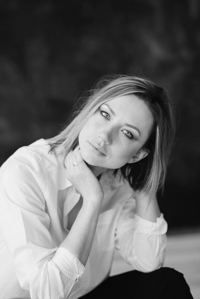

In [103]:
from PIL import Image
import requests
from io import BytesIO
# Load the image as grayscale

url = "https://raw.githubusercontent.com/febse/data/refs/heads/main/ta/example_photo.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert("L")
img = img.resize((200, int(img.height * 200 / img.width)))
display(img)


In [104]:
# Convert the grayscale PIL image to a NumPy array and display as numbers

img_matrix = np.array(img)
print(img_matrix)
print("Shape:", img_matrix.shape, "Dtype:", img_matrix.dtype)

[[ 24  26  25 ...  36  34  30]
 [ 25  25  27 ...  35  32  30]
 [ 24  25  24 ...  34  31  30]
 ...
 [213 214 215 ... 157 156 155]
 [214 214 211 ... 155 155 153]
 [211 209 204 ... 152 152 152]]
Shape: (299, 200) Dtype: uint8


In [105]:
# Do a SVD on the image matrix

U, S, VT = np.linalg.svd(img_matrix, full_matrices=False)


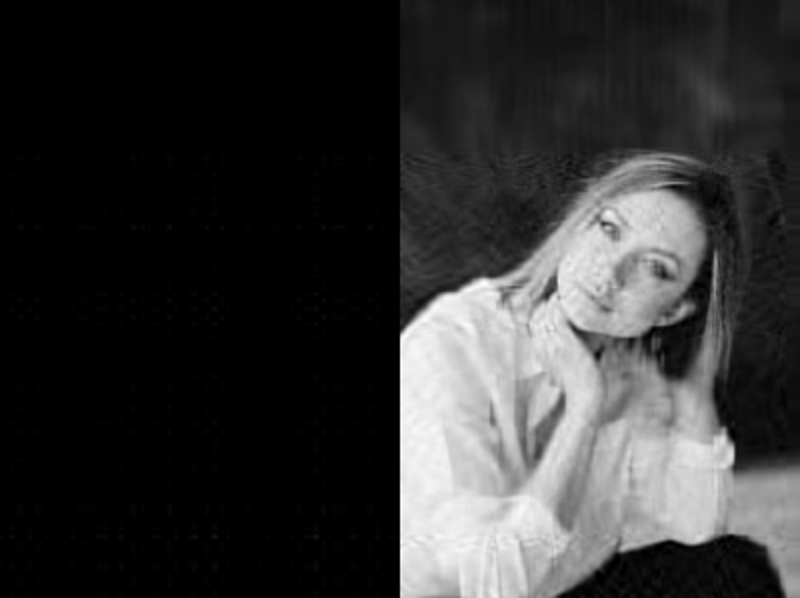

In [117]:
# Compute the outer product of the first column of U with the first row of VT scaled by the first singular value

img_preview = show_reconstructed_image(30, U, S, VT)
display(img_preview)

## Application to Correlated Data



In [41]:
np.random.seed(42)

n = 5

x = np.random.uniform(-2, 2, size=n)
y = x  + np.random.normal(0, 1, n)

hand_lengths = np.vstack([x, y]).T

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x, 
    y=y,
    mode='markers',
    marker=dict(size=8, color='blue')
))

fig.update_layout(
    title='Simulated left/right arm lengths',
    xaxis_title='Left arm (cm)',
    yaxis_title='Right arm (cm)',
    width=600,
    height=500
)

fig.show()

In [42]:
U, Sigma, VT = np.linalg.svd(hand_lengths)


In [43]:
U.round(3)

array([[-0.112, -0.368,  0.728,  0.452, -0.343],
       [ 0.792, -0.234,  0.128,  0.191,  0.514],
       [ 0.195,  0.73 ,  0.583, -0.298, -0.003],
       [ 0.029,  0.525, -0.254,  0.81 , -0.044],
       [-0.566,  0.024,  0.222,  0.117,  0.785]])

In [44]:
Sigma

array([4.21147015, 0.75493145])

In [45]:
VT.round(3)

array([[ 0.583,  0.812],
       [ 0.812, -0.583]])

In [46]:
# Plot the hands data and the two VT components, scaled by the singular values
import numpy as np
import plotly.graph_objects as go

# Compute mean of x and y from the data
mean_x = np.mean(hand_lengths[:, 0])
mean_y = np.mean(hand_lengths[:, 1])
mean_point = np.array([mean_x, mean_y])

fig = go.Figure()

# Plot the hand_lengths matrix as a scatter plot (each row as a point)
fig.add_trace(go.Scatter(
    x=hand_lengths[:, 0],
    y=hand_lengths[:, 1],
    mode='markers',
    marker=dict(size=10, color='black'),
    name='Hand data'
))

# Plot the two VT components (right singular vectors), scaled by singular values, at the mean
colors = ['red', 'blue']
for i in range(min(2, VT.shape[0], Sigma.shape[0])):
    vec = VT[i, :2] * Sigma[i]
    tip = mean_point + vec
    fig.add_trace(go.Scatter(
        x=[mean_point[0], tip[0]],
        y=[mean_point[1], tip[1]],
        mode='lines+markers',
        line=dict(width=4, color=colors[i]),
        marker=dict(size=12, color=colors[i]),
        name=f'VT component {i+1} (scaled)'
    ))

fig.update_layout(
    title="Hand Data and VT Components (Scaled by Singular Values)",
    xaxis=dict(title='Dimension 1'),
    yaxis=dict(title='Dimension 2', scaleanchor='x', scaleratio=1),
    width=700, height=700
)
fig.show()